<a href="https://colab.research.google.com/github/Dullard-boy/Hamoye-Data-Science-Internship-2023/blob/main/HDSC'23_Spring_Cohort_Premier_Project_Anaconda_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
file_path= '/content/recalls.csv'
with open(file_path, 'r') as file:
    content = file.read()
    print(content)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
import pandas as pd
data = pd.read_csv(file_path)

In [5]:
data.columns

Index(['Report Received Date', 'NHTSA ID', 'Recall Link', 'Manufacturer',
       'Subject', 'Component', 'Mfr Campaign Number', 'Recall Type',
       'Potentially Affected', 'Recall Description', 'Consequence Summary',
       'Corrective Action'],
      dtype='object')

# **Data Cleaning**

In [6]:
#removing unwanted columns
columns_to_delete = ['Report Received Date', 'NHTSA ID', 'Recall Link','Mfr Campaign Number', 'Recall Description']
data = data.drop(columns=columns_to_delete)

In [7]:
data.columns

Index(['Manufacturer', 'Subject', 'Component', 'Recall Type',
       'Potentially Affected', 'Consequence Summary', 'Corrective Action'],
      dtype='object')

In [8]:
#finding the total number of missings columns per column
data.isnull().sum()

Manufacturer               0
Subject                    0
Component                  0
Recall Type                0
Potentially Affected      42
Consequence Summary     4888
Corrective Action       2388
dtype: int64

In [9]:
#dropping rows with missing values in the potentially affected columns
column_name='Potentially Affected'
data.dropna(subset=[column_name], inplace=True)

In [10]:
#finding the total number of missings columns per column
data.isnull().sum()

Manufacturer               0
Subject                    0
Component                  0
Recall Type                0
Potentially Affected       0
Consequence Summary     4888
Corrective Action       2388
dtype: int64

In [11]:
#saving the cleaned data
data.to_excel('recalls_cleaned.xlsx')

# Data Analysis and Visualization

In [12]:
#What are the top 10 Vehicle Manufacturers with highest recalls?
top10_manufacturers=data['Manufacturer'].value_counts().head(10)
top10_manufacturers

General Motors, LLC                  1608
Ford Motor Company                   1395
Chrysler (FCA US, LLC)               1320
Volkswagen Group of America, Inc.     520
BMW of North America, LLC             487
Forest River, Inc.                    476
Daimler Trucks North America, LLC     474
Mercedes-Benz USA, LLC                414
Honda (American Honda Motor Co.)      401
PACCAR Incorporated                   388
Name: Manufacturer, dtype: int64

In [13]:
top10_manufacturers = {
    'Vehicle Manufacturer': ['General Motors, LLC', 'Ford Motor Company', 'Chrysler (FCA US, LLC)', 'Volkswagen Group of America, Inc.', 'BMW of North America, LLC', 'Forest River, Inc.', 'Daimler Trucks North America, LLC', 'Mercedes-Benz USA, LLC', 'Honda (American Honda Motor Co.)', 'PACCAR Incorporated'],
    'Number of Recalls': [1608, 1395, 1320, 520, 487, 476, 474, 414, 401, 388]
}

top10_manufacturers = pd.DataFrame(top10_manufacturers)

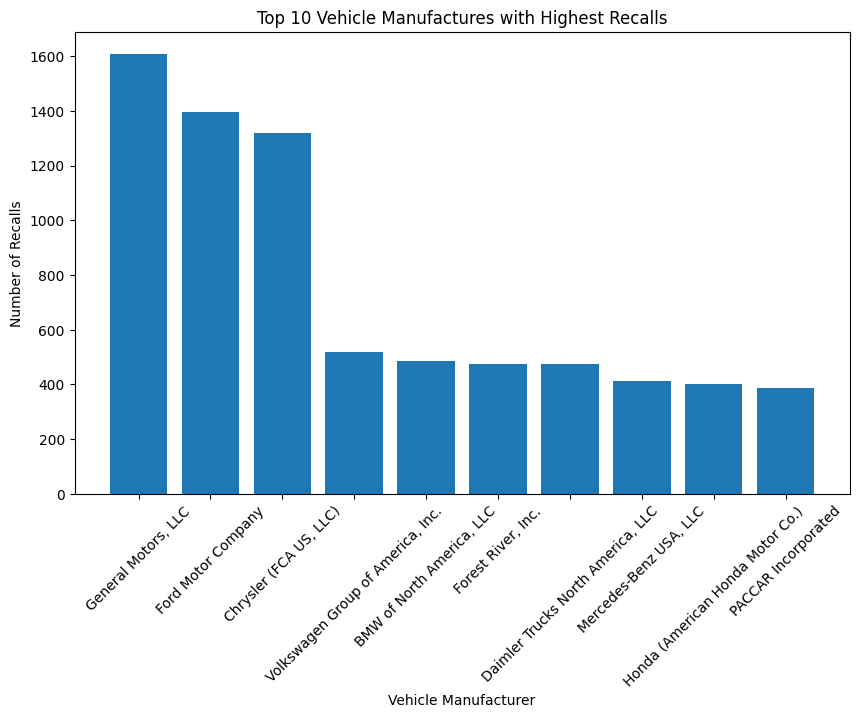

In [14]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(top10_manufacturers['Vehicle Manufacturer'], top10_manufacturers['Number of Recalls'])
plt.xlabel('Vehicle Manufacturer')
plt.ylabel('Number of Recalls')
plt.title('Top 10 Vehicle Manufactures with Highest Recalls')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

#Save the chart
plt.savefig('Top 10 Vehicle Manufactures with Highest Recalls', bbox_inches = "tight")

# Display the chart
plt.show()

In [15]:
#Grouping data based on recall type
grouped_data=data.groupby('Recall Type')

#Isolating the vehicle recall type group
vehicle=grouped_data.get_group('Vehicle')

In [16]:
#What are the top 5 manufacturers with vehicle recall type?
top5_manufacturer=vehicle['Manufacturer'].value_counts().head()
print(top5_manufacturer)

General Motors, LLC                  1595
Ford Motor Company                   1381
Chrysler (FCA US, LLC)               1286
Volkswagen Group of America, Inc.     518
BMW of North America, LLC             481
Name: Manufacturer, dtype: int64


In [17]:
import pandas as pd

top5_manufacturer = {'Manufacturer': ['General Motors, LLC', 'Ford Motor Company', 'Chrysler (FCA US, LLC)', 'Volkswagen Group of America, Inc.', 'BMW of North America, LLC'],
    'Number of Vehicle Recalls': [1595, 1381, 1286, 518, 481]}

top5_manufacturer = pd.DataFrame(top5_manufacturer)


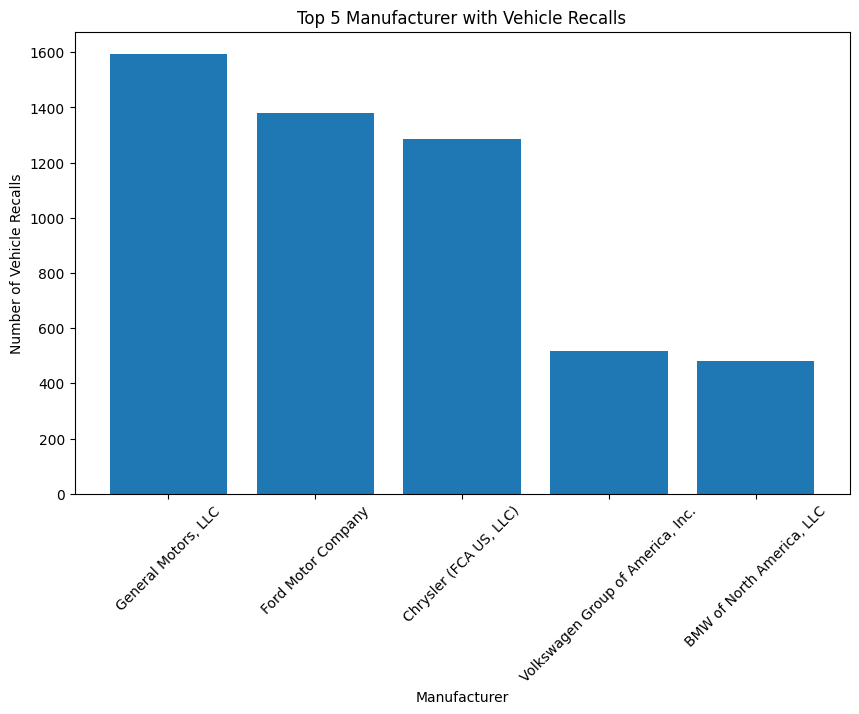

In [18]:
#Creating bar chart
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))
x= top5_manufacturer['Manufacturer']
y= top5_manufacturer['Number of Vehicle Recalls']
plt.bar(x,y)
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicle Recalls')
plt.title('Top 5 Manufacturer with Vehicle Recalls')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

#Save the chart
plt.savefig('Vehicle Recalls by Manufacturer.png', bbox_inches = "tight")

# Display the chart
plt.show()


In [19]:
#What are the top 10 components with vehicle recall type?
top10_component=vehicle['Component'].value_counts().head(10)
print(top10_component)

EQUIPMENT                    3022
ELECTRICAL SYSTEM            1999
STEERING                     1690
SERVICE BRAKES, HYDRAULIC    1541
SUSPENSION                   1405
FUEL SYSTEM, GASOLINE        1289
STRUCTURE                    1164
POWER TRAIN                  1153
ENGINE AND ENGINE COOLING     995
SERVICE BRAKES, AIR           939
Name: Component, dtype: int64


In [20]:
top10_component = {
    'Components': ['EQUIPMENT', 'ELECTRICAL SYSTEM', 'STEERING', 'SERVICE BRAKES, HYDRAULIC', 'SUSPENSION', 'FUEL SYSTEM, GASOLINE', 'STRUCTURE', 'POWER TRAIN', 'ENGINE AND ENGINE COOLING', 'SERVICE BRAKES, AIR'],
    'Number of Recalls': [3022, 1999, 1690, 1541, 1405, 1289, 1164, 1153, 995, 939]
}

top10_component = pd.DataFrame(top10_component)

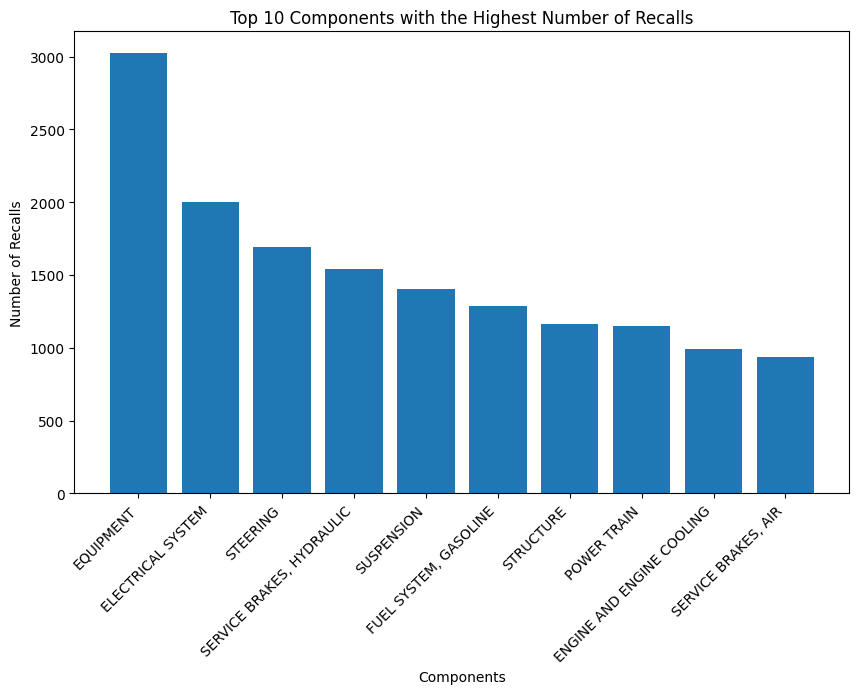

In [21]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10_component['Components'], top10_component['Number of Recalls'])
plt.xlabel('Components')
plt.ylabel('Number of Recalls')
plt.title('Top 10 Components with the Highest Number of Recalls')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')


#Save the chart
plt.savefig('Vehicle Recalls by Component.png', bbox_inches = "tight")

#Display the chart
plt.show()

In [22]:
#What is the average number of people potentially affected by vehicle recall type?
Average_number_of_people_potentially_affected=vehicle['Potentially Affected'].mean()
print("Average Number of People Potentially Affected by Vehicle recalls:",Average_number_of_people_potentially_affected)

#What is the highest number of people potentially affected by vehicle recall type?
Highest_number_of_people_potentially_affected=vehicle['Potentially Affected'].max()
print("Highest Number of People Potentially Affected by Vehicle recalls:",Highest_number_of_people_potentially_affected)

#What is the lowest number of people potentially affected by vehicle recall type?
Lowest_number_of_people_potentially_affected=vehicle['Potentially Affected'].min()
print("Lowest Number of People Potentially Affected by Vehicle recalls:",Lowest_number_of_people_potentially_affected)

Average Number of People Potentially Affected by Vehicle recalls: 38798.23937369882
Highest Number of People Potentially Affected by Vehicle recalls: 21000000.0
Lowest Number of People Potentially Affected by Vehicle recalls: 0.0


In [23]:

# Find the value with the highest "Potentially Affected" count and corresponding "Component"
highest_value = vehicle['Potentially Affected'].idxmax()
component_highest = vehicle.loc[highest_value, 'Component']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value = vehicle['Potentially Affected'].idxmin()
component_lowest = vehicle.loc[lowest_value, 'Component']

print("Component with the highest Potentially Affected count by vehicle recall:", component_highest)
print("Component with the lowest Potentially Affected count by vehicle recall:", component_lowest)

Component with the highest Potentially Affected count by vehicle recall: POWER TRAIN
Component with the lowest Potentially Affected count by vehicle recall: AIR BAGS


In [24]:
# Find the value with the highest "Potentially Affected" count and corresponding "Manufacturer"
highest_value = vehicle['Potentially Affected'].idxmax()
manufacturer_highest = vehicle.loc[highest_value, 'Manufacturer']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value = vehicle['Potentially Affected'].idxmin()
manufacturer_lowest = vehicle.loc[lowest_value, 'Manufacturer']

print("Manufacturer with the highest Potentially Affected count by vehicle recall:", manufacturer_highest)
print("Manufacturer with the lowest Potentially Affected count by vehicle recall:", manufacturer_lowest)

Manufacturer with the highest Potentially Affected count by vehicle recall: Ford Motor Company
Manufacturer with the lowest Potentially Affected count by vehicle recall: Honda (American Honda Motor Co.)


In [25]:
#Isolating the tire recall type group
tire=grouped_data.get_group('Tire')

In [26]:
#What are the top 5 Manufacturer with Tire recall type?
top5_manufacturer=tire['Manufacturer'].value_counts().head(5)
print(top5_manufacturer)

Cooper Tire & Rubber Co.          145
UNIROYAL GOODRICH TIRE CO          81
FIRESTONE TIRE & RUBBER CO.        60
Goodyear Tire & Rubber Company     50
GENERAL TIRE & RUBBER CO.          40
Name: Manufacturer, dtype: int64


In [27]:
top5_manufacturer = {
    'Manufacturer': ['Cooper Tire & Rubber Co', 'UNIROYAL GOODRICH TIRE CO', 'FIRESTONE TIRE & RUBBER CO', 'Goodyear Tire & Rubber Company', 'GENERAL TIRE & RUBBER CO'],
    'Number of Recalls': [145, 81, 60, 50, 40]
}

top5_manufacturer = pd.DataFrame(top5_manufacturer)

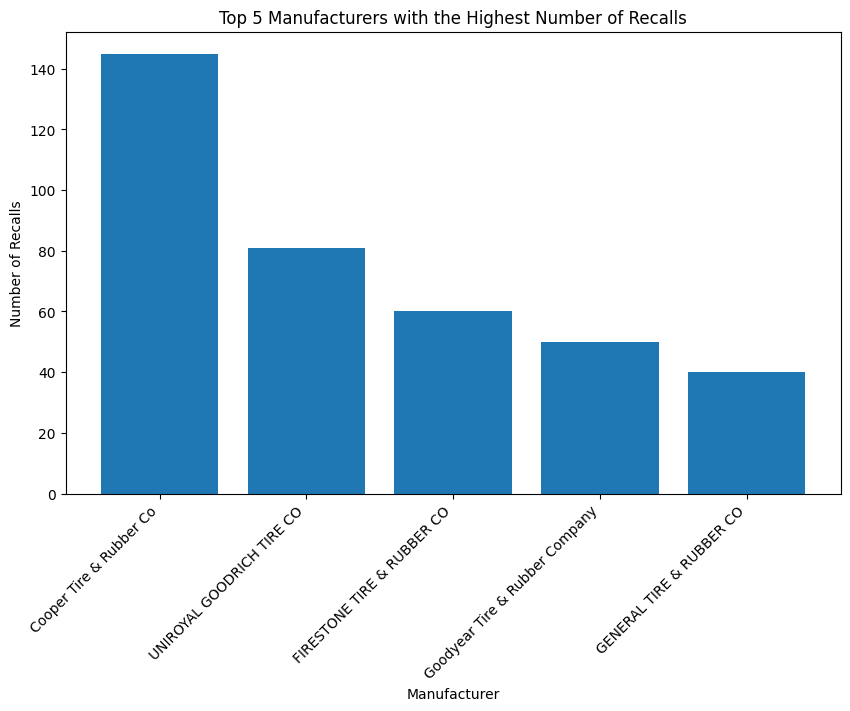

In [28]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top5_manufacturer['Manufacturer'], top5_manufacturer['Number of Recalls'])
plt.xlabel('Manufacturer')
plt.ylabel('Number of Recalls')
plt.title('Top 5 Manufacturers with the Highest Number of Recalls')
plt.xticks(rotation=45, ha='right')

#Saving the chart
plt.savefig('Tire Recalls by Manufacturer.png', bbox_inches = "tight")

#Display the chart
plt.show()

In [29]:
#What are the top 10 Components with Tire recall type?
top10_components=tire['Component'].value_counts().head(10)
print(top10_components)

TIRES        742
EQUIPMENT      1
Name: Component, dtype: int64


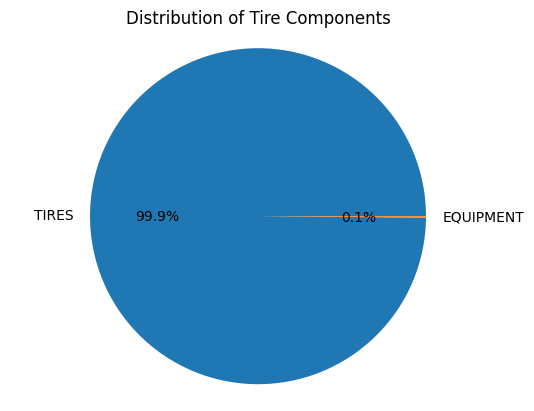

In [30]:
tire_comp = {
    'Category': ['TIRES', 'EQUIPMENT'],
    'Count': [742, 1]
}

# Create the pie chart
plt.pie(tire_comp['Count'], labels=tire_comp['Category'], autopct='%1.1f%%')

# Set the aspect ratio to be equal to make the pie circular
plt.axis('equal')

# Set a title for the pie chart
plt.title('Distribution of Tire Components')

#Save the chart
plt.savefig('Tire Recalls by Component.png')

# Display the chart
plt.show()


In [31]:
#What is the average number of people potentially affected by tire recall type?
Average_number_of_people_potentially_affected=tire['Potentially Affected'].mean()
print("Average Number of People Potentially Affected by Tire recalls:",Average_number_of_people_potentially_affected)

#What is the highest number of people potentially affected by tire recall type?
Highest_number_of_people_potentially_affected=tire['Potentially Affected'].max()
print("Highest Number of People Potentially Affected by Tire recalls:",Highest_number_of_people_potentially_affected)

#What is the lowest number of people potentially affected by tire recall type?
Lowest_number_of_people_potentially_affected=tire['Potentially Affected'].min()
print("Lowest Number of People Potentially Affected by Tire recalls:",Lowest_number_of_people_potentially_affected)

Average Number of People Potentially Affected by Tire recalls: 82637.80349932706
Highest Number of People Potentially Affected by Tire recalls: 14500000.0
Lowest Number of People Potentially Affected by Tire recalls: 2.0


In [32]:
# Find the value with the highest "Potentially Affected" count and corresponding "Component"
highest_value = tire['Potentially Affected'].idxmax()
component_highest = tire.loc[highest_value, 'Component']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value = tire['Potentially Affected'].idxmin()
component_lowest = tire.loc[lowest_value, 'Component']

print("Component with the highest Potentially Affected count by tire recall:", component_highest)
print("Component with the lowest Potentially Affected count by tire recall:", component_lowest)

Component with the highest Potentially Affected count by tire recall: TIRES
Component with the lowest Potentially Affected count by tire recall: TIRES


In [33]:
# Find the value with the highest "Potentially Affected" count and corresponding "Manufacturer"
highest_value = tire['Potentially Affected'].idxmax()
manufacturer_highest = tire.loc[highest_value, 'Manufacturer']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value = tire['Potentially Affected'].idxmin()
manufacturer_lowest = tire.loc[lowest_value, 'Manufacturer']

print("Manufacturer with the highest Potentially Affected count by tire recall:", manufacturer_highest)
print("Manufacturer with the lowest Potentially Affected count by tire recall:", manufacturer_lowest)

Manufacturer with the highest Potentially Affected count by tire recall: FIRESTONE TIRE & RUBBER CO.
Manufacturer with the lowest Potentially Affected count by tire recall: Cooper Tire & Rubber Co.


In [34]:
#Isolating the equipment recall type group
equipment=grouped_data.get_group('Equipment')

In [35]:
#What are the top 5 Manufacturer with Equipment recall type?
top5_manufacturer=equipment['Manufacturer'].value_counts().head(5)
print(top5_manufacturer)


Cummins, Inc.              67
Meritor, Inc.              63
ARVINMERITOR AUTOMOTIVE    38
Chrysler (FCA US, LLC)     34
DANA CORPORATION           34
Name: Manufacturer, dtype: int64


In [36]:
top5_manufacturer = {
    'Manufacturer': ['Cummins, Inc.', 'Meritor, Inc.', 'ARVINMERITOR AUTOMOTIVE', 'Chrysler (FCA US, LLC)', 'DANA CORPORATION'],
    'Number of Equipment Recalls': [67, 63, 38, 34, 34]
}

top5_manufacturer = pd.DataFrame(top5_manufacturer)

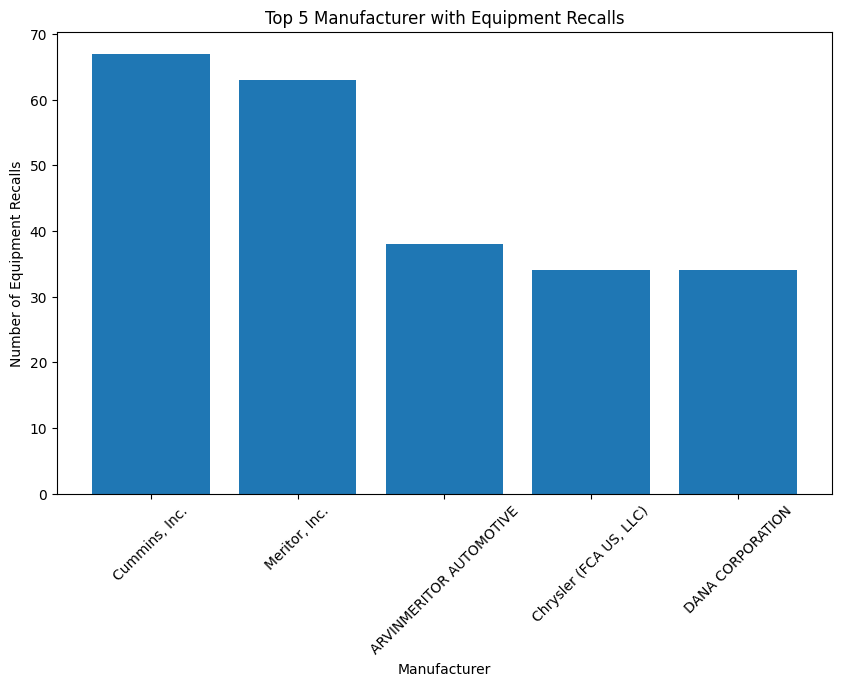

In [37]:
# Create the bar chart
plt.figure(figsize=(10, 6))
x= top5_manufacturer['Manufacturer']
y= top5_manufacturer['Number of Equipment Recalls']
plt.bar(x,y)
plt.xlabel('Manufacturer')
plt.ylabel('Number of Equipment Recalls')
plt.title('Top 5 Manufacturer with Equipment Recalls')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

#Save the chart
plt.savefig('Equipment Recalls by Manufacturer.png', bbox_inches = "tight")

# Display the chart
plt.show()

In [38]:
#What are the top 10 Components with Equipment recall type?
top10_components=equipment['Component'].value_counts().head(10)
print(top10_components)

EQUIPMENT                    669
EXTERIOR LIGHTING            221
SUSPENSION                   178
STEERING                     138
WHEELS                       123
SERVICE BRAKES, HYDRAULIC    119
SERVICE BRAKES, AIR          114
ENGINE AND ENGINE COOLING     99
ELECTRICAL SYSTEM             97
POWER TRAIN                   86
Name: Component, dtype: int64


In [39]:
top10_component = {
    'Component': ['EQUIPMENT', 'EXTERIOR LIGHTING', 'SUSPENSION', 'STEERING', 'WHEELS', 'SERVICE BRAKES, HYDRAULIC', 'SERVICE BRAKES, AIR', 'ENGINE AND ENGINE COOLING', 'ELECTRICAL SYSTEM', 'POWER TRAIN'],
    'Number of Recalls': [669, 221, 178, 138, 123, 119, 114, 99, 97, 86]
}

top10_component = pd.DataFrame(top10_component)

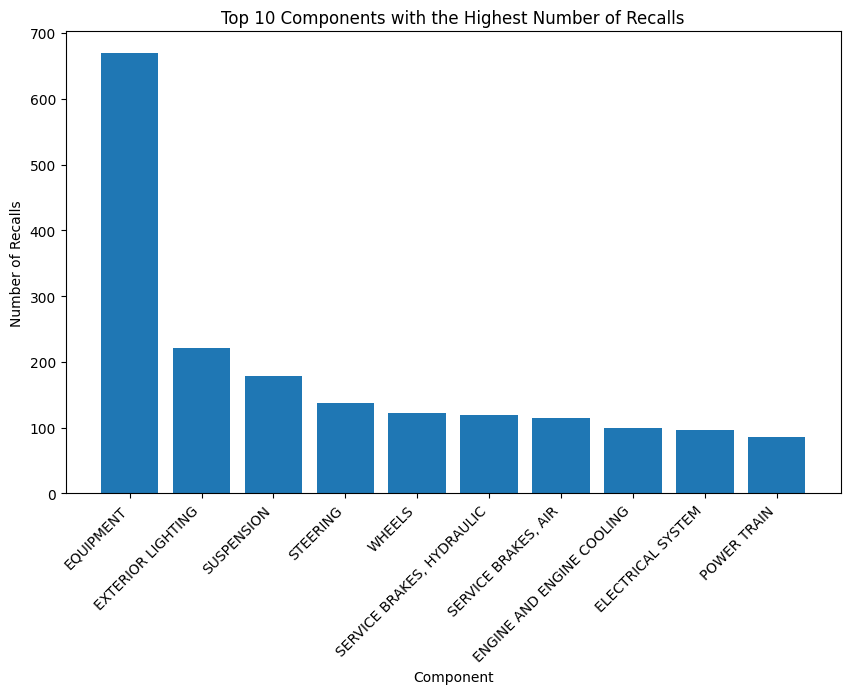

In [40]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10_component['Component'], top10_component['Number of Recalls'])
plt.xlabel('Component')
plt.ylabel('Number of Recalls')
plt.title('Top 10 Components with the Highest Number of Recalls')

#Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

#Save the chart
plt.savefig('Equipment Recalls by Component.png', bbox_inches = "tight")

#Display the chart
plt.show()

In [41]:
#What is the average number of people potentially affected by equipment recall type?
Average_number_of_people_potentially_affected= equipment['Potentially Affected'].mean()
print("Average Number of People Potentially Affected by Equipment recalls:",Average_number_of_people_potentially_affected)

#What is the highest number of people potentially affected by  equipment recall type?
Highest_number_of_people_potentially_affected= equipment['Potentially Affected'].max()
print("Highest Number of People Potentially Affected by Equipment recalls:",Highest_number_of_people_potentially_affected)

#What is the lowest number of people potentially affected by equipment recall type?
Lowest_number_of_people_potentially_affected= equipment['Potentially Affected'].min()
print("Lowest Number of People Potentially Affected by Equipment recalls:",Lowest_number_of_people_potentially_affected)


Average Number of People Potentially Affected by Equipment recalls: 84538.3637807784
Highest Number of People Potentially Affected by Equipment recalls: 32000000.0
Lowest Number of People Potentially Affected by Equipment recalls: 0.0


In [42]:
# Find the value with the highest "Potentially Affected" count and corresponding "Component"
highest_value =  equipment['Potentially Affected'].idxmax()
component_highest =  equipment.loc[highest_value, 'Component']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value =  equipment['Potentially Affected'].idxmin()
component_lowest =  equipment.loc[lowest_value, 'Component']

print("Component with the highest Potentially Affected count by Equipment recall:", component_highest)
print("Component with the lowest Potentially Affected count by Equipment recall:", component_lowest)

Component with the highest Potentially Affected count by Equipment recall: TIRES
Component with the lowest Potentially Affected count by Equipment recall: FUEL SYSTEM, DIESEL


In [43]:
# Find the value with the highest "Potentially Affected" count and corresponding "Manufacturer"
highest_value =  equipment['Potentially Affected'].idxmax()
manufacturer_highest =  equipment.loc[highest_value, 'Manufacturer']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value =  equipment['Potentially Affected'].idxmin()
manufacturer_lowest =  equipment.loc[lowest_value, 'Manufacturer']

print("Manufacturer with the highest Potentially Affected count by equipment recall:", manufacturer_highest)
print("Manufacturer with the lowest Potentially Affected count by equipment recall:", manufacturer_lowest)

Manufacturer with the highest Potentially Affected count by equipment recall: PENNZOIL-QUAKER STATE COMPANY
Manufacturer with the lowest Potentially Affected count by equipment recall: Robert Bosch, LLC


In [44]:
#Isolating the Child Seat recall type group
child_seat=grouped_data.get_group('Child Seat')

In [45]:
#What are the top 5 Manufacturer with Child Seat recall type?
top5_manufacturer=child_seat['Manufacturer'].value_counts().head(5)
print(top5_manufacturer)

Evenflo Company, Inc.              34
CENTURY PRODUCTS                   21
Dorel Juvenile Group               20
Britax Child Safety, Inc.          20
Graco Children's Products, Inc.    16
Name: Manufacturer, dtype: int64


In [46]:
top5_manufacturer ={
    'Manufacturer': ['Evenflo Company, Inc.', 'CENTURY PRODUCTS', 'Dorel Juvenile Group', 'Britax Child Safety, Inc.', 'Graco Children\'s Products, Inc.'],
    'Number of Recalls': [34, 21, 20, 20, 16]
}

top5_manufacturer = pd.DataFrame(top5_manufacturer)

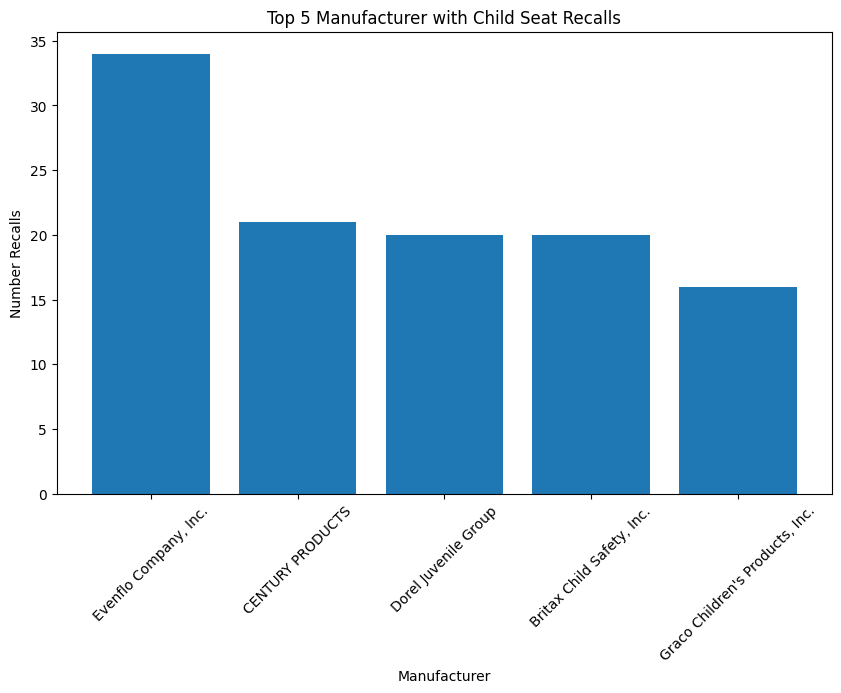

In [47]:
# Create the bar chart
plt.figure(figsize=(10, 6))
x= top5_manufacturer['Manufacturer']
y= top5_manufacturer['Number of Recalls']
plt.bar(x,y)
plt.xlabel('Manufacturer')
plt.ylabel('Number Recalls')
plt.title('Top 5 Manufacturer with Child Seat Recalls')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

#Save the chart
plt.savefig('Child Seat Recalls by Manufacturer.png', bbox_inches = "tight")

# Display the chart
plt.show()

In [48]:
#What are the top 10 Components with Child Seat recall type?
top10_components=child_seat['Component'].value_counts().head(10)
print(top10_components)

CHILD SEAT    227
EQUIPMENT       4
Name: Component, dtype: int64


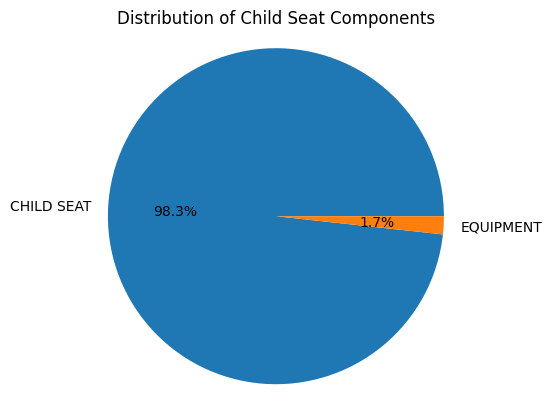

In [49]:
child_seat_comp = {
    'Category': ['CHILD SEAT', 'EQUIPMENT'],
    'Count': [227, 4]
}

# Create the pie chart
plt.pie(child_seat_comp['Count'], labels=child_seat_comp['Category'], autopct='%1.1f%%')

# Set the aspect ratio to be equal to make the pie circular
plt.axis('equal')

# Set a title for the pie chart
plt.title('Distribution of Child Seat Components')

#Save the chart
plt.savefig('Child Seat Recalls by Component.png')

# Display the chart
plt.show()


In [50]:
#What is the average number of people potentially affected by Child Seat recall type?
Average_number_of_people_potentially_affected= child_seat['Potentially Affected'].mean()
print("Average Number of People Potentially Affected by Child Seat recalls:",Average_number_of_people_potentially_affected)

#What is the highest number of people potentially affected by  Child Seat recall type?
Highest_number_of_people_potentially_affected= child_seat['Potentially Affected'].max()
print("Highest Number of People Potentially Affected by Child Seat recalls:",Highest_number_of_people_potentially_affected)

#What is the lowest number of people potentially affected by Child Seat recall type?
Lowest_number_of_people_potentially_affected= child_seat['Potentially Affected'].min()
print("Lowest Number of People Potentially Affected by Child Seat recalls:",Lowest_number_of_people_potentially_affected)


Average Number of People Potentially Affected by Child Seat recalls: 268299.90476190473
Highest Number of People Potentially Affected by Child Seat recalls: 4176601.0
Lowest Number of People Potentially Affected by Child Seat recalls: 4.0


In [51]:
# Find the value with the highest "Potentially Affected" count and corresponding "Component"
highest_value =  child_seat['Potentially Affected'].idxmax()
component_highest =  child_seat.loc[highest_value, 'Component']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value =  child_seat['Potentially Affected'].idxmin()
component_lowest =  child_seat.loc[lowest_value, 'Component']

print("Component with the highest Potentially Affected count by Child Seat recall:", component_highest)
print("Component with the lowest Potentially Affected count by Child Seat recall:", component_lowest)

Component with the highest Potentially Affected count by Child Seat recall: CHILD SEAT
Component with the lowest Potentially Affected count by Child Seat recall: CHILD SEAT


In [52]:
# Find the value with the highest "Potentially Affected" count and corresponding "Manufacturer"
highest_value =  child_seat['Potentially Affected'].idxmax()
manufacturer_highest =  child_seat.loc[highest_value, 'Manufacturer']

# Find the value with the lowest "Potentially Affected" count and corresponding "Component"
lowest_value =  child_seat['Potentially Affected'].idxmin()
manufacturer_lowest =  child_seat.loc[lowest_value, 'Manufacturer']

print("Manufacturer with the highest Potentially Affected count by Child Seat recall:", manufacturer_highest)
print("Manufacturer with the lowest Potentially Affected count by Child Seat recall:", manufacturer_lowest)

Manufacturer with the highest Potentially Affected count by Child Seat recall: Graco Children's Products, Inc.
Manufacturer with the lowest Potentially Affected count by Child Seat recall: Evenflo Company, Inc.


In [53]:
data.dtypes

Manufacturer             object
Subject                  object
Component                object
Recall Type              object
Potentially Affected    float64
Consequence Summary      object
Corrective Action        object
dtype: object

In [54]:
data.shape

(26548, 7)

In [55]:
data.isnull().sum()

Manufacturer               0
Subject                    0
Component                  0
Recall Type                0
Potentially Affected       0
Consequence Summary     4888
Corrective Action       2388
dtype: int64

**Data Modelling**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Separate the data with missing values
data_missing = data[data['Corrective Action'].isnull()]
data_remaining = data[~data['Corrective Action'].isnull()]

# Reduce the remaining dataset using stratified sampling based on Recall Type
stratified_data = data_remaining.groupby('Recall Type', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000)))

# Split the resulting dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(stratified_data[['Manufacturer', 'Subject', 'Component', 'Recall Type']],
                                                    stratified_data['Corrective Action'],
                                                    test_size=0.2,
                                                    random_state=42)

# Fit and train the model
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.astype(str).apply(' '.join, axis=1))
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_vectorized, y_train)

# Test the model
X_test_vectorized = vectorizer.transform(X_test.astype(str).apply(' '.join, axis=1))
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Predict the missing values
X_missing_vectorized = vectorizer.transform(data_missing[['Manufacturer', 'Subject', 'Component', 'Recall Type']].astype(str).apply(' '.join, axis=1))
y_missing_pred = model.predict(X_missing_vectorized)

# Assign the predicted values to the missing rows in the original DataFrame
data_missing['Corrective Action'] = y_missing_pred

# Concatenate the data with missing values and the remaining data
data_combined = pd.concat([data_remaining, data_missing])

# Final DataFrame with predicted missing values
final_data = data_combined[['Manufacturer', 'Subject', 'Component', 'Recall Type', 'Corrective Action']]


Test Accuracy: 0.003527336860670194


<ipython-input-56-28bdeb686d70>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing['Corrective Action'] = y_missing_pred


In [57]:
from sklearn.metrics import precision_score

# Calculate precision on the test dataset
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision on Test Dataset:", precision)

# Calculate precision on the predicted missing values
missing_data_predicted = data_missing.copy()
missing_data_predicted['Corrective Action'] = y_missing_pred
precision_missing = precision_score(data_missing['Corrective Action'], missing_data_predicted['Corrective Action'], average='weighted')
print("Precision on Missing Values:", precision_missing)


Precision on Test Dataset: 3.84976575452766e-05
Precision on Missing Values: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.metrics import recall_score

# Calculate recall on the test dataset
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall on Test Dataset:", recall)

# Calculate recall on the predicted missing values
missing_data_predicted = data_missing.copy()
missing_data_predicted['Corrective Action'] = y_missing_pred
recall_missing = recall_score(data_missing['Corrective Action'], missing_data_predicted['Corrective Action'], average='weighted')
print("Recall on Missing Values:", recall_missing)

Recall on Test Dataset: 0.003527336860670194
Recall on Missing Values: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Separate the data with missing values
data_missing = data[data['Corrective Action'].isnull()]
data_remaining = data[~data['Corrective Action'].isnull()]

# Reduce the remaining dataset using stratified sampling based on Recall Type
stratified_data = data_remaining.groupby('Recall Type', group_keys=False).apply(lambda x: x.sample(min(len(x), 1000)))

# Split the resulting dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(stratified_data[['Manufacturer', 'Subject', 'Component', 'Recall Type']],
                                                    stratified_data['Corrective Action'],
                                                    test_size=0.2,
                                                    random_state=42)

# Define the categorical columns for one-hot encoding
categorical_columns = ['Manufacturer', 'Subject', 'Component', 'Recall Type']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Fit and transform the training data with the preprocessor
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data with the preprocessor
X_test_encoded = preprocessor.transform(X_test)

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit and train the model
model.fit(X_train_encoded, y_train)

# Test the model
y_pred = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Predict the missing values
X_missing_encoded = preprocessor.transform(data_missing[['Manufacturer', 'Subject', 'Component', 'Recall Type']])
y_missing_pred = model.predict(X_missing_encoded)

# Assign the predicted values to the missing rows in the original DataFrame
data_missing['Corrective Action'] = y_missing_pred

# Concatenate the data with missing values and the remaining data
data_combined = pd.concat([data_remaining, data_missing])

# Final DataFrame with predicted missing values
final_data = data_combined[['Manufacturer', 'Subject', 'Component', 'Recall Type', 'Corrective Action']]

Test Accuracy: 0.010582010582010581


<ipython-input-59-8ecd9f8034c1>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing['Corrective Action'] = y_missing_pred


In [60]:
from sklearn.metrics import precision_score

# Calculate precision on the test dataset
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision on Test Dataset:", precision)

# Calculate precision on the predicted missing values
missing_data_predicted = data_missing.copy()
missing_data_predicted['Corrective Action'] = y_missing_pred
precision_missing = precision_score(data_missing['Corrective Action'], missing_data_predicted['Corrective Action'], average='weighted')
print("Precision on Missing Values:", precision_missing)


Precision on Test Dataset: 0.006494778981551468
Precision on Missing Values: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Calculate recall on the test dataset
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall on Test Dataset:", recall)

# Calculate recall on the predicted missing values
missing_data_predicted = data_missing.copy()
missing_data_predicted['Corrective Action'] = y_missing_pred
recall_missing = recall_score(data_missing['Corrective Action'], missing_data_predicted['Corrective Action'], average='weighted')
print("Recall on Missing Values:", recall_missing)

Recall on Test Dataset: 0.010582010582010581
Recall on Missing Values: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
